In [4]:
# prompt: read a csv file

import pandas as pd

# Replace 'your_file.csv' with the actual name of your CSV file.
# If the file is not in the curre
#nt directory, provide the full path.
df = pd.read_csv('/content/Infosys Google Sheets Example - Sheet1.csv')

# Print the first few rows of the DataFrame to verify it's loaded correctly.
df.head()


,id,subject,body,answer,type,queue,priority,language,business_type,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7,tag_8,tag_9
0,1001352387736,Urgent: Critical impact on enterprise network ...,"Dear Customer Support Team, We are experiencin...",Subject: Re: Urgent: Critical impact on enterp...,Incident,Technical Support,high,en,IT Services,Service Outage,Network Issue,Urgent Issue,Technical Support,Problem Resolution,Critical Failure,System Crash,Service Disruption,NaN
1,1004699418379,Intermittent Cursor Freezing Issue on Dell XPS,"Dear Customer Support,<br><br>I hope this mess...","Dear <name>,\n\n\nThank you for reaching out r...",Incident,Product Support,low,en,Tech Online Store,Technical Support,Product Support,Hardware Failure,Problem Resolution,Urgent Issue,Service Recovery,Documentation Request,NaN,NaN
2,1006966905046,Dringend: Unterstützung für die Datenwiederher...,"Hallo, wir haben severe Datenverluste in MySQL...","Hallo, vielen Dank, dass Sie uns kontaktiert h...",Incident,Technical Support,high,de,IT Services,Data Breach,Backup Restore,Technical Support,Urgent Issue,Software Bug,Problem Resolution,NaN,NaN,NaN
3,1009231330404,Anfrage zu den MacBook Air M1 Funktionen,"Sehr geehrtes Kundenserviceteam,\n\n\nich hoff...","Sehr geehrter <name>,\n\n\nvielen Dank für Ihr...",Request,Sales and Pre-Sales,low,de,Tech Online Store,Customer Service,Product Support,Sales Inquiry,Technical Guidance,Warranty Claim,General Inquiry,NaN,NaN,NaN
4,1024440081041,Solicitação de Assistência com Erro de Instala...,"Caro Suporte ao Cliente,\n\n\nEstou enfrentand...","Caro <name>,\n\n\nObrigado por entrar em conta...",Problem,Technical Support,medium,pt,IT Services,Technical Support,Software Bug,Urgent Issue,Problem Resolution,Product Support,NaN,NaN,NaN,NaN


In [5]:
df.shape

(1566, 18)

In [6]:
df = df.loc[df["language"].eq("en"), :]

In [7]:
import pandas as pd

# Assuming 'df' is already defined and loaded with your data as in the previous code.

def escalate_issue(df):
    """
    Escalates issues based on priority and keywords in tags.
    """

    # Define priority thresholds and keywords for escalation.
    high_priority_threshold = 3  # Example: Priority >= 3 is high.
    escalation_keywords = ["critical", "urgent", "severe", "major"]

    # Create a new column 'escalated' initialized to False.
    df['escalated'] = False

    # Identify issues to escalate.
    for index, row in df.iterrows():
        # Convert 'priority' to an integer before comparison
        try:
            priority = int(row['priority'])
        except ValueError:
            # Handle cases where 'priority' cannot be converted to an integer
            priority = 0  # or any other default value

        if priority >= high_priority_threshold:
            df.loc[index, 'escalated'] = True
        # Check if 'Tags' column exists before accessing it (case-sensitive)
        elif 'Tags' in df.columns and isinstance(row['Tags'], str):
            tags_list = row['Tags'].lower().split(',')  # Convert to lowercase and split tags
            for keyword in escalation_keywords:
                if keyword in tags_list:
                    df.loc[index, 'escalated'] = True
                    break  # Stop checking keywords if one is found

    return df

# Apply the escalation function.
df = escalate_issue(df)

# Display the updated DataFrame with the 'escalated' column.
df

# You can save the updated DataFrame to a new CSV file:
# df.to_csv('escalated_issues.csv', index=False)

<ipython-input-7-ce0130b42d4d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['escalated'] = False


,id,subject,body,answer,type,queue,priority,language,business_type,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7,tag_8,tag_9,escalated
0,1001352387736,Urgent: Critical impact on enterprise network ...,"Dear Customer Support Team, We are experiencin...",Subject: Re: Urgent: Critical impact on enterp...,Incident,Technical Support,high,en,IT Services,Service Outage,Network Issue,Urgent Issue,Technical Support,Problem Resolution,Critical Failure,System Crash,Service Disruption,NaN,False
1,1004699418379,Intermittent Cursor Freezing Issue on Dell XPS,"Dear Customer Support,<br><br>I hope this mess...","Dear <name>,\n\n\nThank you for reaching out r...",Incident,Product Support,low,en,Tech Online Store,Technical Support,Product Support,Hardware Failure,Problem Resolution,Urgent Issue,Service Recovery,Documentation Request,NaN,NaN,False
5,1024619926727,Exchange Request for Malfunctioning Dell XPS 13,"Dear Tech Online Store Customer Support,\n\n\n...","Dear <name>,\n\n\nThank you for reaching out a...",Change,Returns and Exchanges,medium,en,Tech Online Store,Returns and Exchanges,Product Replacement,Customer Service,Technical Support,Order Issue,NaN,NaN,NaN,NaN,False
6,1026487543175,Request for Server Administration Assistance,"Dear IT Services Customer Support, \n\n\nWe ar...",Subject: Re: Request for Server Administration...,Request,Product Support,medium,en,IT Services,Technical Support,IT Support,Performance Tuning,Problem Resolution,Technical Guidance,Service Recovery,NaN,NaN,NaN,False
7,1027850274374,Immediate Attention Required: AWS Outage Concern,"Greetings IT Services Customer Support,\n\n\nI...","Hello <name>,\n\n\nWe appreciate you informing...",Incident,Technical Support,high,en,IT Services,Service Outage,Urgent Issue,IT Support,System Maintenance,Incident Report,Customer Service,NaN,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1517,9669312561194,AWS Authentication Issues,"Dear IT Services Support Team, \n\n\nI am writ...","Dear <name>,\n\n\nThank you for reaching out a...",Request,Technical Support,high,en,IT Services,Technical Support,IT Support,Urgent Issue,Service Disruption,Problem Resolution,Account Security,NaN,NaN,NaN,False
1528,9774682113827,Immediate Assistance Needed: Issues with Serve...,"Dear Customer Support Team,\n\n\nI am contacti...","Dear <name>,\n\n\nThank you for reaching out t...",Request,Technical Support,high,en,IT Services,Technical Support,IT Support,Urgent Issue,System Crash,Service Disruption,Problem Resolution,NaN,NaN,NaN,False
1536,9805447223568,High Priority: Recurring Network Disruptions,"Hello Customer Support Team,\n\n\nOur Cisco Ro...",Subject: Re: High Priority: Recurring Network ...,Incident,IT Support,high,en,IT Services,Network Issue,Urgent Issue,Problem Resolution,Technical Support,Service Disruption,Technical Guidance,NaN,NaN,NaN,False
1537,9813537492092,Request for Support,I would appreciate help setting up my Canon PI...,Of course! Hold down the Wi-Fi button until th...,Request,Customer Service,low,en,Tech Online Store,Technical Support,Product Support,General Inquiry,Problem Resolution,NaN,NaN,NaN,NaN,NaN,False


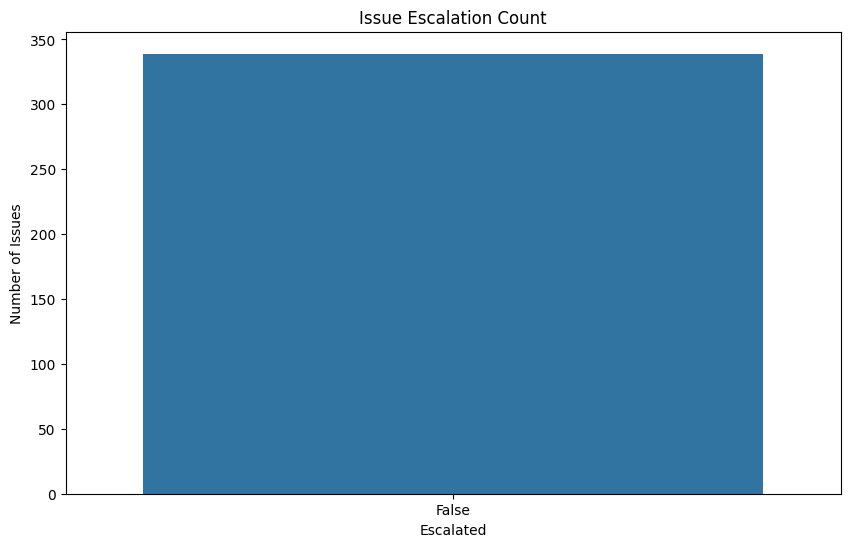

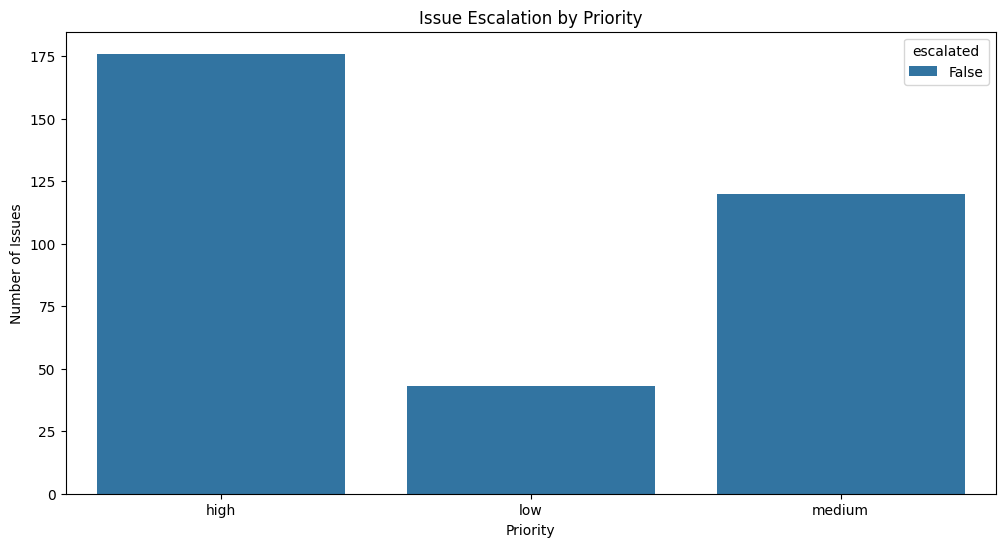

In [8]:
# prompt: data visualization for issue escalation

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Replace 'your_file.csv' with the actual name of your CSV file.
# If the file is not in the current directory, provide the full path.
df = pd.read_csv('/content/Infosys Google Sheets Example - Sheet1.csv')

# Print the first few rows of the DataFrame to verify it's loaded correctly.
df.head()

df.shape
df = df.loc[df["language"].eq("en"), :]

# Assuming 'df' is already defined and loaded with your data as in the previous code.

def escalate_issue(df):
    """
    Escalates issues based on priority and keywords in tags.
    """

    # Define priority thresholds and keywords for escalation.
    high_priority_threshold = 3  # Example: Priority >= 3 is high.
    escalation_keywords = ["critical", "urgent", "severe", "major"]

    # Create a new column 'escalated' initialized to False.
    df['escalated'] = False

    # Identify issues to escalate.
    for index, row in df.iterrows():
        # Convert 'priority' to an integer before comparison
        try:
            priority = int(row['priority'])
        except ValueError:
            # Handle cases where 'priority' cannot be converted to an integer
            priority = 0  # or any other default value

        if priority >= high_priority_threshold:
            df.loc[index, 'escalated'] = True
        # Check if 'Tags' column exists before accessing it (case-sensitive)
        elif 'Tags' in df.columns and isinstance(row['Tags'], str):
            tags_list = row['Tags'].lower().split(',')  # Convert to lowercase and split tags
            for keyword in escalation_keywords:
                if keyword in tags_list:
                    df.loc[index, 'escalated'] = True
                    break  # Stop checking keywords if one is found

    return df

# Apply the escalation function.
df = escalate_issue(df)

# Display the updated DataFrame with the 'escalated' column.
df

# --- Data Visualization ---
plt.figure(figsize=(10, 6))
sns.countplot(x='escalated', data=df)
plt.title('Issue Escalation Count')
plt.xlabel('Escalated')
plt.ylabel('Number of Issues')
plt.show()


# Visualize escalation by priority
plt.figure(figsize=(12, 6))
sns.countplot(x='priority', hue='escalated', data=df)
plt.title('Issue Escalation by Priority')
plt.xlabel('Priority')
plt.ylabel('Number of Issues')
plt.show()


#Further analysis and visualizations can be added as needed

# Example:  Visualizing top tags associated with escalated issues (if 'Tags' column exists)
if 'Tags' in df.columns:
    escalated_df = df[df['escalated'] == True]
    tag_counts = escalated_df['Tags'].str.lower().str.split(',').explode().value_counts().head(10)
    plt.figure(figsize=(10,6))
    tag_counts.plot(kind='bar')
    plt.title('Top 10 Tags in Escalated Issues')
    plt.xlabel('Tags')
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

In [9]:
# prompt: use some keywords from tags columns in dataset for issue escalation

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Replace 'your_file.csv' with the actual name of your CSV file.
# If the file is not in the current directory, provide the full path.
df = pd.read_csv('/content/Infosys Google Sheets Example - Sheet1.csv')

# Print the first few rows of the DataFrame to verify it's loaded correctly.
df.head()

df.shape
df = df.loc[df["language"].eq("en"), :]

def escalate_issue(df):
    """
    Escalates issues based on priority and keywords in tags.
    """

    # Define priority thresholds and keywords for escalation.
    high_priority_threshold = 3  # Example: Priority >= 3 is high.
    escalation_keywords = ["critical", "urgent", "severe", "major"]

    # Create a new column 'escalated' initialized to False.
    df['escalated'] = False

    # Identify issues to escalate.
    for index, row in df.iterrows():
        try:
            priority = int(row['priority'])
        except (ValueError, TypeError):
            priority = 0

        if priority >= high_priority_threshold:
            df.loc[index, 'escalated'] = True
        elif 'Tags' in df.columns and pd.notna(row['Tags']):
            tags_list = str(row['Tags']).lower().split(',')
            for keyword in escalation_keywords:
                if keyword in tags_list:
                    df.loc[index, 'escalated'] = True
                    break

    return df

# Apply the escalation function.
df = escalate_issue(df)

# Display the updated DataFrame with the 'escalated' column.
df


,id,subject,body,answer,type,queue,priority,language,business_type,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7,tag_8,tag_9,escalated
0,1001352387736,Urgent: Critical impact on enterprise network ...,"Dear Customer Support Team, We are experiencin...",Subject: Re: Urgent: Critical impact on enterp...,Incident,Technical Support,high,en,IT Services,Service Outage,Network Issue,Urgent Issue,Technical Support,Problem Resolution,Critical Failure,System Crash,Service Disruption,NaN,False
1,1004699418379,Intermittent Cursor Freezing Issue on Dell XPS,"Dear Customer Support,<br><br>I hope this mess...","Dear <name>,\n\n\nThank you for reaching out r...",Incident,Product Support,low,en,Tech Online Store,Technical Support,Product Support,Hardware Failure,Problem Resolution,Urgent Issue,Service Recovery,Documentation Request,NaN,NaN,False
5,1024619926727,Exchange Request for Malfunctioning Dell XPS 13,"Dear Tech Online Store Customer Support,\n\n\n...","Dear <name>,\n\n\nThank you for reaching out a...",Change,Returns and Exchanges,medium,en,Tech Online Store,Returns and Exchanges,Product Replacement,Customer Service,Technical Support,Order Issue,NaN,NaN,NaN,NaN,False
6,1026487543175,Request for Server Administration Assistance,"Dear IT Services Customer Support, \n\n\nWe ar...",Subject: Re: Request for Server Administration...,Request,Product Support,medium,en,IT Services,Technical Support,IT Support,Performance Tuning,Problem Resolution,Technical Guidance,Service Recovery,NaN,NaN,NaN,False
7,1027850274374,Immediate Attention Required: AWS Outage Concern,"Greetings IT Services Customer Support,\n\n\nI...","Hello <name>,\n\n\nWe appreciate you informing...",Incident,Technical Support,high,en,IT Services,Service Outage,Urgent Issue,IT Support,System Maintenance,Incident Report,Customer Service,NaN,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1517,9669312561194,AWS Authentication Issues,"Dear IT Services Support Team, \n\n\nI am writ...","Dear <name>,\n\n\nThank you for reaching out a...",Request,Technical Support,high,en,IT Services,Technical Support,IT Support,Urgent Issue,Service Disruption,Problem Resolution,Account Security,NaN,NaN,NaN,False
1528,9774682113827,Immediate Assistance Needed: Issues with Serve...,"Dear Customer Support Team,\n\n\nI am contacti...","Dear <name>,\n\n\nThank you for reaching out t...",Request,Technical Support,high,en,IT Services,Technical Support,IT Support,Urgent Issue,System Crash,Service Disruption,Problem Resolution,NaN,NaN,NaN,False
1536,9805447223568,High Priority: Recurring Network Disruptions,"Hello Customer Support Team,\n\n\nOur Cisco Ro...",Subject: Re: High Priority: Recurring Network ...,Incident,IT Support,high,en,IT Services,Network Issue,Urgent Issue,Problem Resolution,Technical Support,Service Disruption,Technical Guidance,NaN,NaN,NaN,False
1537,9813537492092,Request for Support,I would appreciate help setting up my Canon PI...,Of course! Hold down the Wi-Fi button until th...,Request,Customer Service,low,en,Tech Online Store,Technical Support,Product Support,General Inquiry,Problem Resolution,NaN,NaN,NaN,NaN,NaN,False


In [10]:
# prompt: what are the key word you find from tags

escalation_keywords = ["critical", "urgent", "severe", "major"]

In [23]:
# prompt: Categories, product names and issues finalized with their % coverage in dataset

# Assuming 'df' is already defined and loaded with your data as in the previous code.
# and the 'escalate_issue' function is defined as well.

# Calculate the percentage of issues in each category that are escalated
category_escalation_percentage = df.groupby('body')['escalated'].value_counts(normalize=True) * 100

# Display the results
category_escalation_percentage


,,proportion
body,escalated,
Cannot connect to wifi.,False,100.0
Conflicting network configurations.,False,100.0
Could you please provide the most current details about AWS usage and cost recommendations?,False,100.0
Customer <name> reports Epson EcoTank ET-4760 won't connect to the network. Requesting guidance for wireless setup diagnostics to resolve the issue promptly. Please assist soon.,False,100.0
Customer unable to access AWS console post-update; needs immediate resolution.,False,100.0
...,...,...
The customer is facing challenges with accessing the AWS console following the latest update; they need immediate support.,False,100.0
"To whom it may concern, I am writing to report frequent disconnects with our Cisco Router ISR4331, which is impacting secure networking services. This issue has been affecting our high performance tech support team that relies on stable connections. Timely resolution of this issue is crucial for maintaining our service standards. I would appreciate technical guidance or a site visit to promptly resolve this matter. Please let us know the appointment process or escalation process. Thank you for your attention. Best regards, <name>",False,100.0
"User in HR unable to access Jira queue, impacting ticket handling. Please assist in resolving this issue with Jira Software 8.20 version.",False,100.0


In [21]:
# Calculate the percentage of escalated issues for each product
product_escalation_percentage = df.groupby('subject')['escalated'].value_counts(normalize=True) * 100

# Display the results
product_escalation_percentage


,,proportion
subject,escalated,
AWS Authentication Issues,False,100.0
AWS Cost Optimization Help,False,100.0
AWS Deployment Issues,False,100.0
AWS Management Service Inquiry,False,100.0
AWS Performance Issues,False,100.0
...,...,...
Urgent: User unable to join scheduled Zoom meeting,False,100.0
Urgent: Zoom Application Down,False,100.0
Wi-Fi Connectivity Issues with Canon PIXMA MG3620 Printer,False,100.0


In [22]:
# Calculate the percentage of escalated issues for each issue name
issue_escalation_percentage = df.groupby('answer')['escalated'].value_counts(normalize=True) * 100

# Display the results
issue_escalation_percentage

,,proportion
answer,escalated,
"Certainly! Press and hold the Wi-Fi button until you notice the power light blinking, then hit Black. Link it to your router. Obtain the drivers from Canon's website.",False,100.0
"Dear <Name>,\n\n\nThank you for reaching out to us regarding our AWS Management Service. We specialize in offering tailored solutions designed to optimize costs, manage resources efficiently, and improve application performance on AWS.\n\n\nOur AWS Management Service includes:\n- Cost Optimization: We analyze your usage patterns to identify savings opportunities.\n- Performance Enhancement: Continuous monitoring and scaling recommendations to ensure peak performance.\n- Resource Management: Best practices for resource allocation and utilization for efficiency.\n\n\nWe offer various packages to suit your needs, ranging from basic monitoring to comprehensive management solutions. I will be happy to provide detailed information on our packages, including features and pricing. Kindly let me know your preferences, and I can assist further.\n\n\nPlease feel free to reach out if you have any more questions or need specific insights.\n\n\nBest regards,\nCustomer Support Team",False,100.0
"Dear <name>,\n\n\nI'm sorry to hear about the issues you're experiencing. To initiate a return for your HP DeskJet 3755 and request a refund, please visit our returns page on our website, where you can complete the return form. Ensure you have the purchase receipt and packaging ready. If you need further assistance, feel free to contact us directly at <support_email>. \n\n\nThank you for reaching out to us.\n\n\nBest regards,\nCustomer Support Team",False,100.0
"Dear <name>,\n\n\nThank you for bringing the issues with your ticket system to our attention. We understand the urgency and impact it has on your operations. Our technical support team will prioritize your request and work to address the problems of crashes, ticket duplication, and data misalignment as soon as possible.\n\n\nPlease send us any specific logs or additional details to assist in diagnosing the issue effectively. We will keep you updated with our progress and try to resolve the errors swiftly to minimize disruption to your services.\n\n\nYou can expect a follow-up from us shortly. Should you need immediate assistance or have further queries, feel free to reach out.\n\n\nThank you for your patience and cooperation.\n\n\nBest regards,\nIT Services Customer Support Team",False,100.0
"Dear <name>,\n\n\nThank you for bringing this to our attention. We are sorry to hear about the performance issues you experienced with the Dell XPS 13 9310 during the demonstration. We take such feedback seriously and will investigate the problem promptly. Our technical team is looking into the matter to ensure the device meets expected performance standards. We will update you on the actions taken to address this issue. We appreciate your understanding and patience.\n\n\nBest regards,\nCustomer Support Team",False,100.0
...,...,...
Thank you for reaching out. We are looking into the issue with AWS console access and will respond shortly with further information.,False,100.0
"Thank you for reaching out. We recommend updating the router's firmware and checking for any recent configuration changes. If the issue persists, please contact support for further diagnostics.",False,100.0
"Thank you for your communication. We recommend upgrading the router's firmware and checking for any recent changes made to the configuration. If the issue persists, feel free to contact support for additional assistance.",False,100.0


In [16]:
# Assuming 'df' is already defined and loaded with your data as in the previous code.
# and the 'escalate_issue' function is defined as well.

# Replace 'actual_category_column_name' with the actual name of your category column
# if it's different from 'category'.
category_column_name = 'body'

# Check if the column exists in the DataFrame
if category_column_name in df.columns:
    # Calculate the percentage of issues in each category that are escalated
    category_escalation_percentage = df.groupby(category_column_name)['escalated'].value_counts(normalize=True) * 100
else:
    print(f"Column '{category_column_name}' not found in DataFrame.")
    # Handle the case where the column is not found, e.g., skip this calculation or
    # provide an alternative way to group the data.


# Display the results if the calculation was performed
if 'category_escalation_percentage' in locals():
    print(category_escalation_percentage)


# Calculate the percentage of escalated issues for each product
# Replace 'actual_product_column_name' with the actual name of your product column
# if it's different from 'product'.
product_column_name = 'subject'

# Check if the column exists in the DataFrame
if product_column_name in df.columns:
    product_escalation_percentage = df.groupby(product_column_name)['escalated'].value_counts(normalize=True) * 100
else:
    print(f"Column '{product_column_name}' not found in DataFrame.")
    # Handle the case where the column is not found

# Display the results if the calculation was performed
if 'product_escalation_percentage' in locals():
    print(product_escalation_percentage)



# Calculate the percentage of escalated issues for each issue name
# Replace 'actual_issue_column_name' with the actual name of your issue column
# if it's different from 'issue'.
issue_column_name = 'subject'

# Check if the column exists in the DataFrame
if issue_column_name in df.columns:
    issue_escalation_percentage = df.groupby(issue_column_name)['escalated'].value_counts(normalize=True) * 100
else:
    print(f"Column '{issue_column_name}' not found in DataFrame.")
    # Handle the case where the column is not found

# Display the results if the calculation was performed
if 'issue_escalation_percentage' in locals():
    print(issue_escalation_percentage)

body                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     escalated
Cannot connect to wifi.                                                                                                                                                                                                                                                                                                                                                                                                                                              